In [1]:
%config IPCompleter.greedy=True

# Building a neural network!

First let's import some prerequisites



In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (11,11) # Make the figures a bit bigger

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import Model

# Import needed modules, keras, and numpy

Using TensorFlow backend.


# Load training data

In [3]:
# Create Network parameters
batch_size = 128
nb_classes = 10
epochs = 4
img_rows, img_cols = 28,28

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train original shape: ", x_train.shape)
print("y_train original shape:", y_train.shape)

x_train original shape:  (60000, 28, 28)
y_train original shape: (60000,)


In [5]:
# Create the input image dimensions


In [6]:
# Create a input shape

In [7]:
# Load the data, shuffled and split between train and test sets

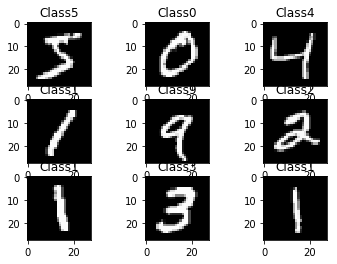

In [4]:
# Print shape from the train and test sets
for i in range(9):
    plt.subplot(3,3,i + 1)
    plt.imshow(x_train[i], cmap='gray', interpolation=None)
    plt.title("Class{}".format(y_train[i]))

# Let's look at some examples of the training data

In [9]:
# Plot the first nine images

# Prepare the data for training

In [5]:
# Convert train and test type to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print("Min_value: ", x_train.min(), "Max_value: ", x_train.max())
x_train /= 255
x_test /= 255
print("Min_value: ", x_train.min(), "Max_value: ", x_train.max())


Min_value:  0.0 Max_value:  255.0
Min_value:  0.0 Max_value:  1.0


In [6]:
# Binarize train and test sets

In [7]:
# Print train and test shapes
print(y_train[:10])
y_train = keras.utils.to_categorical(y_train, nb_classes)
y_test = keras.utils.to_categorical(y_test, nb_classes)
print("")
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [8]:
# Print first ten labels

In [9]:
# Converts a label vector (integers) to binary class matrix (One-hot)

In [10]:
# Print first ten labels

# Build networks


![title](figure.png)

### Simple Neural Network

In [11]:
# write a function to create a simple neural network
def simple_NN (input_shape, nb_classes):
    inputs = Input(shape=input_shape)
    y = Dense(512, activation='relu')(inputs)
    y = Dense(512, activation='relu')(y)
    y = Dense(nb_classes, activation='softmax')(y)
    return Model(inputs, y, name='simple_NN')

### Simple Convolutional Neural Network

In [12]:
# write a function to create a simple CNN
def simple_CNN(input_shape, nb_classes):
    inputs = Input(shape=input_shape)
    y = Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=input_shape)(inputs)
    y = MaxPooling2D(pool_size=(2,2))(y)
    y = Flatten()(y)
    y = Dense(100, activation='relu')(y)
    y = Dense(nb_classes, activation='softmax')(y)
    return Model(inputs, y, name='simple_CNN')
    

# Create models

In [13]:
# create the models here
input_shape_nn = (784,)
input_shape_cnn = (img_rows, img_cols, 1)

simple_NN_model = simple_NN(input_shape_nn, nb_classes)
simple_CNN_model = simple_CNN(input_shape_cnn, nb_classes)


# Summary from the Models

In [14]:
# Print the Models layers and weights
print("Simple NN sumary")
simple_NN_model.summary()
print("Simple CNN summary")
simple_CNN_model.summary()


Simple NN sumary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Simple CNN summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
__________________________________

# Compile the models

In [15]:
# Compile the models
simple_NN_model.compile(loss=keras.losses.categorical_crossentropy, 
                       optimizer=keras.optimizers.Adadelta(),
                       metrics=['accuracy'])

simple_CNN_model.compile(loss=keras.losses.categorical_crossentropy, 
                       optimizer=keras.optimizers.Adadelta(),
                       metrics=['accuracy'])

# Train the models

In [ ]:
# Train your models here
x_train_nn = x_train.reshape(x_train.shape[0], *input_shape_nn)
x_test_nn = x_test.reshape(x_test.shape[0], *input_shape_nn)


x_train_cnn = x_train.reshape(x_train.shape[0], *input_shape_cnn)
x_test_cnn = x_train.reshape(x_train.shape[0], *input_shape_cnn)

simple_NN_model.fit(x_train_nn[0:100,:], y_train[0:100,:],
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=1,
                   validation_data=(x_test_nn, y_test))

"""simple_CNN_model.fit(x_train_cnn, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=1,
                   validation_data=(x_test_nn, y_test))"""



Train on 100 samples, validate on 10000 samples
Epoch 1/4


# Evaluate  performance


In [38]:
# Evaluate your models here